In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('dataset/dataset_all.csv')


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

statistical_features = ['word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety']
# Assuming you have a 'split' column to distinguish between train and test data
train_data = data[data['split'] == 'train']
test_data = data[data['split'] == 'test']

# Fit and transform the training data
train_data[statistical_features] = scaler.fit_transform(train_data[statistical_features])

# Transform the test data based on the scaler fitted to the training data
test_data[statistical_features] = scaler.transform(test_data[statistical_features])

# Extract features and labels
X_train = train_data[statistical_features]
y_train = train_data['label']
X_test = test_data[statistical_features]
y_test = test_data['label']

C:\Users\27gur\AppData\Local\Temp\ipykernel_24832\696043496.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[statistical_features] = scaler.fit_transform(train_data[statistical_features])
C:\Users\27gur\AppData\Local\Temp\ipykernel_24832\696043496.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[statistical_features] = scaler.transform(test_data[statistical_features])


In [4]:
print(X_train)
print(y_train)

       word_count  unique_word_count  char_count  avg_word_length       ttr  \
1        0.125737           0.158537    0.110176         0.048981  0.768652   
3        0.561886           0.448171    0.534047         0.055545  0.504326   
4        0.923379           0.731707    0.855394         0.053752  0.502433   
5        0.758350           0.609756    0.607881         0.043773  0.509419   
6        0.045187           0.073171    0.042081         0.051239  0.895295   
...           ...                ...         ...              ...       ...   
74075    0.583497           0.481707    0.530604         0.052298  0.522321   
74077    0.365422           0.353659    0.344682         0.054803  0.609902   
74078    0.133595           0.152439    0.147666         0.066058  0.699092   
74079    0.434185           0.332317    0.408187         0.054634  0.482780   
74080    0.029470           0.057927    0.048585         0.091510  1.000000   

       hapax_legomenon  sentence_count  avg_sentenc

In [5]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [6]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.880047789725209
Confusion Matrix:
 [[  110  3126]
 [  388 25671]]
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.03      0.06      3236
           1       0.89      0.99      0.94     26059

    accuracy                           0.88     29295
   macro avg       0.56      0.51      0.50     29295
weighted avg       0.82      0.88      0.84     29295



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# count the number of features
n_features = X_train.shape[1]

# define the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)




Epoch 1/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8899
Epoch 2/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8938
Epoch 3/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8938
Epoch 4/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.8938
Epoch 5/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.8938
Epoch 6/500
700/700 [==============================] - 1s 1ms/step - loss: 0.2999 - accuracy: 0.8938
Epoch 7/500
700/700 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.8938
Epoch 8/500
700/700 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.8938
Epoch 9/500
700/700 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8938
Epoch 10/500
700/700 [==============================] - 1s 2ms/step - loss: 0.2925 - accura

In [6]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.890


In [7]:
# print classification report
y_pred = model.predict_classes(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix:
 [[    0  3236]
 [    0 26059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3236
           1       0.89      1.00      0.94     26059

    accuracy                           0.89     29295
   macro avg       0.44      0.50      0.47     29295
weighted avg       0.79      0.89      0.84     29295

Accuracy: 0.8895374637310122


c:\Users\27gur\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\27gur\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\27gur\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# print the number of samples in each class in test set
print(y_test.value_counts())

1    26059
0     3236
Name: label, dtype: int64


In [1]:
import tensorflow as tf
# tensorflow version
print(tf.__version__)

2.3.0


In [2]:
# check if GPU is available
print(tf.test.is_gpu_available())

# list of available GPUs
print(tf.config.experimental.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import autokeras as ak

In [11]:
clf = ak.StructuredDataClassifier(max_trials = 10)
clf.fit(X_train, y_train, verbose=1, epochs=30)

Trial 10 Complete [00h 03m 51s]
val_accuracy: 0.8976078629493713

Best val_accuracy So Far: 0.9053208231925964
Total elapsed time: 00h 40m 51s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/30
1400/1400 [==============================] - 8s 5ms/step - loss: 0.3024 - accuracy: 0.8889
Epoch 2/30
1400/1400 [==============================] - 8s 6ms/step - loss: 0.2698 - accuracy: 0.8992
Epoch 3/30
1400/1400 [==============================] - 8s 6ms/step - loss: 0.2630 - accuracy: 0.9007
Epoch 4/30
1400/1400 

916/916 [==============================] - 5s 5ms/step - loss: 0.3259 - accuracy: 0.8814
Accuracy =  88.13790678977966 %
916/916 [==============================] - 3s 3ms/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 26)                0         
_________________________________________________________________
normalization (Normalization (None, 26)                53        
_________________________________________________________________
dense (Dense)                (None, 32)                864       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (D

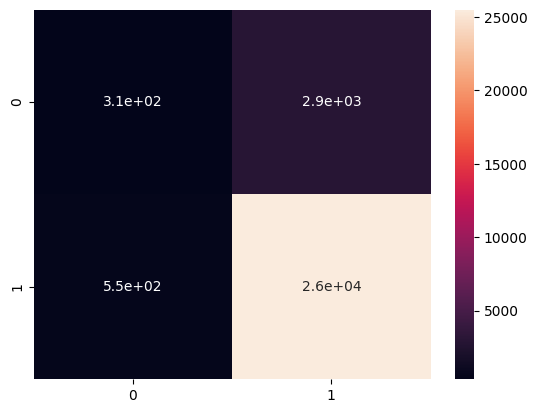

In [12]:
import seaborn as sns
#Evaluate the classifier on test data
_, acc = clf.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

# get the final best performing model
model = clf.export_model()
print(model.summary())

In [13]:
# get the final best performing model
model = clf.export_model()
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 26)                0         
_________________________________________________________________
normalization (Normalization (None, 26)                53        
_________________________________________________________________
dense (Dense)                (None, 32)                864       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
classification_head_1 (Activ (None, 1)                

In [16]:
# print classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  314  2922]
 [  553 25506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.10      0.15      3236
           1       0.90      0.98      0.94     26059

    accuracy                           0.88     29295
   macro avg       0.63      0.54      0.54     29295
weighted avg       0.84      0.88      0.85     29295

Accuracy: 0.881379074927462
